## Analysis of patent examination process
`This version: 2020-06-19`

In [1]:
import pandas as pd
import numpy as np
import qeds
import matplotlib.pyplot as plt

In [2]:
%%time
path = r'E:\Data\Patents\Idea-production\patent_track_data.csv'
data = pd.read_csv(path, parse_dates = ["apply_date", "law_date", "grant_date", "expire_date"])

Wall time: 4.31 s


In [3]:
data.head(5)

,patent_id,firm,firm_id,apply_date,law_date,law_status,law_dummy,grant_date,expire_date,grant_dummy,expire_dummy,reject_dummy,expire_reason,apply_year,grant_year,invalid_year
0,CN200710126038.3,中兴通讯股份有限公司,27939873X,2007-06-29,2009-05-06,授权,1,2009-05-06,NaT,1,0.0,0,NaN,2007,2009.0,NaN
1,CN200710017985.9,西安力邦制药有限公司,710174566,2007-06-04,2010-08-25,授权,1,2010-08-25,NaT,1,0.0,0,NaN,2007,2010.0,NaN
2,CN200710017339.2,中国石油天然气股份有限公司长庆石化分公司,727375006,2007-02-02,2009-12-16,授权,1,2009-12-16,NaT,1,0.0,0,NaN,2007,2009.0,NaN
3,CN200610082956.6,海尔集团公司,163562681,2006-06-21,2011-06-15,授权,1,2011-06-15,NaT,1,0.0,0,NaN,2006,2011.0,NaN
4,CN200710138918.2,华为技术有限公司,192203821,2007-07-18,2011-02-16,授权,1,2011-02-16,NaT,1,0.0,0,NaN,2007,2011.0,NaN


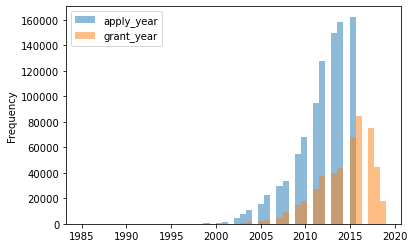

In [9]:
# year of applying and granting
data[['apply_year', 'grant_year']].plot.hist(alpha=0.5, bins=50)
plt.show()

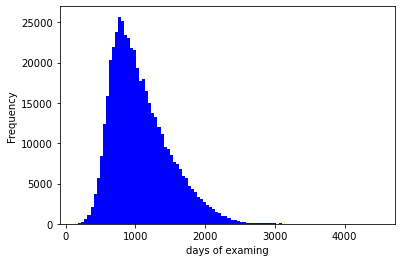

In [12]:
# length of patent examination
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
data['exam_days'] = data['grant_date'] - data['apply_date']
data['exam_days'] = data['exam_days']/np.timedelta64(1, 'D')
data['exam_years'] = data['grant_date'] - data['apply_date']
data['exam_years'] = data['exam_years']/np.timedelta64(1, 'Y')
data['valid_days'] = data['expire_date'] - data['grant_date']
data['valid_days'] = data['valid_days']/np.timedelta64(1, 'D')
data['valid_years'] = data['expire_date'] - data['grant_date']
data['valid_years'] = data['valid_years']/np.timedelta64(1, 'Y')

data['exam_days'].plot(kind = 'hist',color='b', bins = 100, alpha = 1)
plt.xlabel('days of examing')
plt.show()

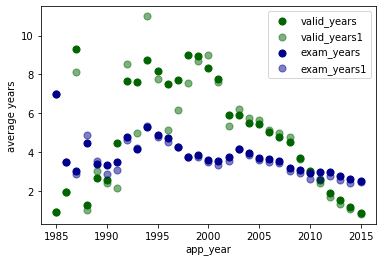

In [9]:
# number of valid years and application years

dtasort_apply = data.groupby(["apply_year"])
dtasort_grant = data.groupby(["grant_year"])
mean_year = dtasort_apply[["valid_years", "exam_years"]].mean()
median_year = dtasort_apply[['valid_years', 'exam_years']].median()
df_meany = mean_year.copy()
df_medny = median_year.copy()
df_meany['app_year'] = df_meany.index.values
df_medny['app_year'] = df_medny.index.values
ax = df_meany.plot.scatter(x = "app_year",
                           y = "valid_years", c = 'DarkGreen', s=50, label = 'valid_years')
df_medny.plot.scatter(x = "app_year",
                           y = "valid_years", c = 'DarkGreen', s=50, alpha = 0.5, ax = ax, label = 'valid_years1')

df_meany.plot.scatter(x = "app_year", 
                      y ="exam_years", c = 'DarkBlue', s =50, ax = ax, label = 'exam_years')
df_medny.plot.scatter(x = "app_year", 
                      y ="exam_years", c = 'DarkBlue', s =50, alpha = 0.5, ax = ax, label = 'exam_years1')

plt.ylabel('average years')
plt.show()

In [11]:
data.grant_year = data.grant_year.astype(int, errors = 'ignore')
var_list = ['exam_days', 'exam_years', 'valid_days', 'valid_years']
data_2008 = data[data.apply_year == 2008]
data_2008 = data_2008[var_list]
data_2010 = data[data.apply_year == 2010]
data_2010 = data_2010[var_list]
data_2014 = data[data.apply_year == 2014]
data_2014 = data_2014[var_list]

In [12]:
mean_exam_d = data['exam_days'].mean()
std_exam_d = data['exam_days'].std()
exam_d_dist = "mean = {} days, std = {}"
print(exam_d_dist.format(mean_exam_d, std_exam_d))

mean = 1069.6752509927705 days, std = 416.16366664614446


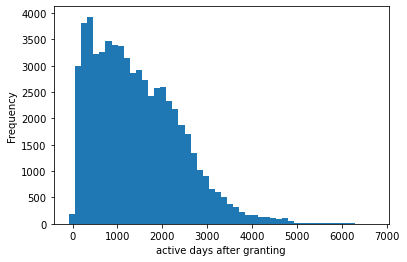

In [13]:
# examination days and valid length
data['valid_days'].plot(kind = 'hist', bins = 50)
plt.xlabel('active days after granting')
plt.show()

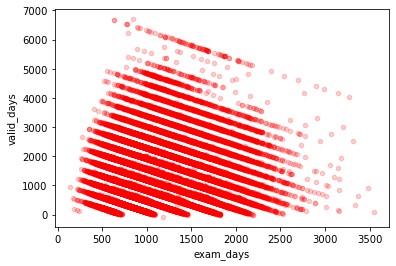

In [14]:
fig1 = data.plot.scatter(x = 'exam_days',
                         y = 'valid_days',
                         c = 'Red', alpha = 0.2)

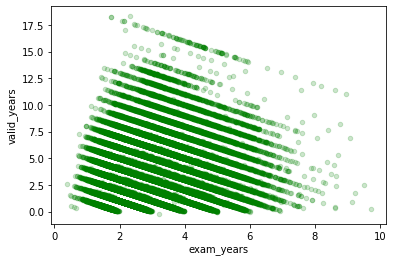

In [15]:
fig2 = data.plot.scatter(x = 'exam_years',
                         y = 'valid_years', 
                         c = 'Green', alpha = 0.2)

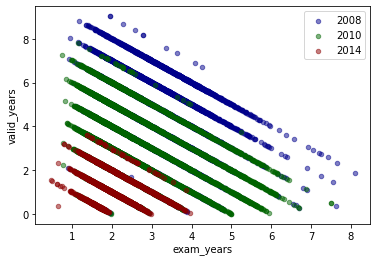

In [16]:
ax2 = data_2008.plot.scatter(x = 'exam_years',
                            y = 'valid_years', 
                            c = 'DarkBlue', label = '2008', alpha = 0.5)
data_2010.plot.scatter(x = 'exam_years',
                            y = 'valid_years', 
                            c = 'DarkGreen', label = '2010', alpha = 0.5, ax = ax2)
data_2014.plot.scatter(x = 'exam_years',
                            y = 'valid_years',
                            c = 'DarkRed', label = '2014', alpha = 0.5, ax = ax2)

plt.show()

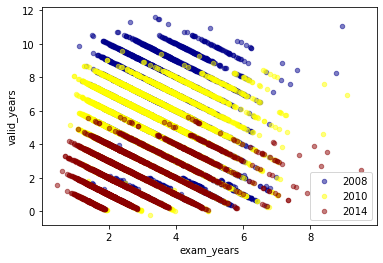

In [17]:
data_2008 = data[data.grant_year == 2008]
data_2008 = data_2008[var_list]
data_2010 = data[data.grant_year == 2010]
data_2010 = data_2010[var_list]
data_2014 = data[data.grant_year == 2014]
data_2014 = data_2014[var_list]
ax = data_2008.plot.scatter(x = 'exam_years',
                            y = 'valid_years', 
                            c = 'DarkBlue', label = '2008', alpha = 0.5)
data_2010.plot.scatter(x = 'exam_years',
                            y = 'valid_years', 
                            c = 'Yellow', label = '2010', alpha = 0.5, ax = ax)
data_2014.plot.scatter(x = 'exam_years',
                            y = 'valid_years',
                            c = 'DarkRed', label = '2014', alpha = 0.5, ax = ax)

plt.show()

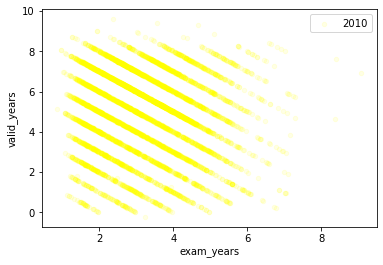

In [18]:
data_2010.plot.scatter(x = 'exam_years',
                            y = 'valid_years', 
                            c = 'Yellow', label = '2010',alpha=0.1)

In [19]:
data_reg = data_2008.dropna()

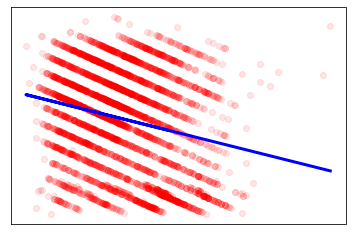

In [20]:
from sklearn import datasets, linear_model
x = data_reg.exam_years.values
y = data_reg.valid_years.values

x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

regm = linear_model.LinearRegression()
regm.fit(x,y)
plt.scatter(x, y,  color='red', alpha=0.1)
plt.plot(x, regm.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()